<h1 align="center"><font size="5">Protein Superfamily Classification Using Kernel
Principal Component Analysis And Probabilistic
Neural Networks</font></h1>

# Introduction

Protein superfamily classification focuses on organizing proteins into their super family and also predicting the family of
newly discovered proteins. Correct classification helps in correct prediction of structure and function of new proteins which
is one of the primary objective of computational biology and
proteomics. Correct prediction of newly discovered proteins
mainly concerns the Biologists or researchers for prediction of
molecular function, drug discovery, medical diagnosis etc

Protein classification can be done by classifying a new protein
to a given family with previously known characteristics. The
aim of classification is to predict target classes for given input
protein. There are many approaches available for classification
tasks, such as statistical techniques, decision trees and the neural networks. Neural networks have been chosen as technical
tools for the protein super family classification task because:


• The extracted features of the protein sequences are distributed in a high dimensional space with complex
characteristics which are difficult to satisfactorily model
using some parametrized approaches.

• The rules produced by decision tree techniques are complex and difficult to understand because the features are
extracted from long character strings

# Data and Methods

## Data collection

<h1 align="center"><font size="2">Table 1: Details of Training and Test Sequence</font></h1>

| Protein Superfamily          | No. of training sequences  | No. of test sequences |
|--------------------|---------|----------|
| Globin (1000)            |  712      | 288    |
| Kinase (750)            |        508   | 242    | 
| Ligase (750)            |           530  | 220   |


## Preprocessing

Extract sequences from .fasta files and save them to .txt files

In [1]:
import pandas as pd
from Bio import SeqIO
from IPython.display import display

list_kinase = list()
list_globin = list()
list_ligase = list()

#define function to Read from .fasta file and append every sequence to the list
def read_from_fasta_file(fasta_file_path):
    li = list()
    for seq_buffer in SeqIO.parse(fasta_file_path, "fasta"):
        #print(seq_buffer.seq)
        li.append(str(seq_buffer.seq))
    return li

list_kinase = read_from_fasta_file("Dataset/data_kinase")
list_globin = read_from_fasta_file("Dataset/data_globin")
list_ligase = read_from_fasta_file("Dataset/data_ligase")
    
    
print("Number of Kinase sequences : {} \nNumber of Hemoglobine sequences : {} \nNumber of Ligas sequences : {}".format(len(list_kinase),len(list_globin),len(list_ligase)))


#define function to save list as .csv file
def save_list_to_csv(list_to_save,file_name):
    
    dict = {'sequence': list_to_save}
    df = pd.DataFrame(dict)
    df.to_csv('Preprocessing/'+'file_name'+'.csv',index=False)
    

save_list_to_csv(list_kinase,"data_kinase")
save_list_to_csv(list_globin,"data_globin")
save_list_to_csv(list_ligase,"data_ligase")

print('\nFirst rows from data_kinase.csv file')
df = pd.read_csv('Preprocessing/data_kinase.csv')
display(df.head())

print('\nFirst rows from data_globin.csv file')
df = pd.read_csv('Preprocessing/data_globin.csv')
display(df.head())

print('\nFirst rows from data_ligase.csv file')
df = pd.read_csv('Preprocessing/data_ligase.csv')
display(df.head())

Number of Kinase sequences : 750 
Number of Hemoglobine sequences : 1000 
Number of Ligas sequences : 750

First rows from data_kinase.csv file


,sequence
0,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
1,MASGSCQGCEEDEETLKKLIVRLNNVQEGKQIETLVQILEDLLVFT...
2,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...
3,MSDVAIVKEGWLHKRGEYIKTWRPRYFLLKNDGTFIGYKERPQDVD...
4,MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEEPPTKYQISQ...



First rows from data_globin.csv file


,sequence
0,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...
1,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...
2,MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFDSF...
3,MLDAQTIATVKATIPLLVETGPKLTAHFYDRMFTHNPELKEIFNMS...
4,MVHLTPEEKTAVNALWGKVNVDAVGGEALGRLLVVYPWTQRFFESF...



First rows from data_ligase.csv file


,sequence
0,MAASQTSQTVASHVPFADLCSTLERIQKSKGRAEKIRHFREFLDSW...
1,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...
2,MPSSKPLAEYARKRDFRQTPEPSGRKPRKDSTGLLRYCVQKHDASR...
3,MGSASEQRVTLTNADKVLYPATGTTKSDIFDYYAGVAEVMLGHIAG...
4,MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNR...


## Feature extraction

Feature selection for protein superfamily classification is one of the major tasks, because every protein contains a huge amount of features. In real world a protein has many features and some of
the features having very less significance in protein superfamily classification. The prime objective of feature selection is to eliminate the less significant feature that helps in accurate prediction and classification . Although, the feature that are eliminated
may provide additional information that may improve the classification and prediction but adds
the additional cost in classification and model may give different result. 

Proteins (also known as polypeptides) are organic compounds made of amino acids arranged in a linear chain or
folded into a globular form. The amino acids are joined
together by the peptide bonds between the carboxyl and amino
groups of adjacent amino acid residues. In general, the genetic
code specifies 20 standard amino acids such as

<h1 align="center"><font size="2">Σ = (A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y )</font></h1>

For protein feature selection, the two gram features such as

<h1 align="center"><font size="2">(AA, AC, · · · AY ), (CA, CC, · · · CY ), · · · (Y A, Y C, · · · Y Y )</font></h1>

are selected. The total number of possible bi-grams from a set
of 20 amino acids is 20², that is, 400 .The two gram features
represent the majority of the protein features

bi-grams
reflecting the pattern of substitution of amino acids are also
extracted. For this purpose, equivalence classes of amino acids
that substitue for one another are derived from the percent
accepted mutation matrix (PAM).Exchange grams are
similar but are based on a many to one translation of the
amino acid alphabet into a six letter alphabet that represents
six groups of amino acids, which represent high evolutionary
similarity. Generally the exchange groups used are :

<h1 align="center"><font size="2">e1 = {H, R, K}, e2 = {D, E, N, Q}, e3 = {C},
e4 = {S, T, P, A, G}, e5 = {M, I, L, V }, and e6 = {F, Y, W}</font></h1>

The total number of possible bi-grams on these six substitution groups is 6² = 36

Besides that, the amino acid distribution (20) and
exchange group distribution(6) are also taken into account.
Consider the amino acid sequence as 

<h1 align="center"><font size="2">MNNPQMNPQRS</font></h1>

The extracted two-gram features are


<h1 align="center"><font size="2">(MN,2),(NN,1),(NP,2)(PQ,2)(QM,1)(QR,1)(RS,1)</font></h1>

The above
sequence can be denoted in terms of 6-letter exchange group
as

<h1 align="center"><font size="2">e5e2e2e4e2e5e2e4e2e1e4</font></h1>

The two gram features of exchange group can be denoted as


<h1 align="center"><font size="2">{(e5e2, 2), (e2e2, 1), (e2e4, 2), (e4e2, 2), (e2e5, 1), (e2e1, 1), (e1e4, 1)}</font></h1>

Besides the bigram measure and exchange group residues
some other features are also extracted such as:

<h1 align="center"><font size="2">X(1), X(2), · · · , X(5) = atomic composition<br>
X(6) = molecular weight<br>
X(7) = isoelectric point<br>
X(8) = average mass of protein sequence<br>
X(9), X(8), · · · X(28) = amino acid distribution<br>
X(29), X(30), · · · X(428) = two gram distribution<br>
X(429), X(430) · · · X(434) = exchange group distribution<br>
X(435), X(434) · · · X(470) = two gram exchange group distribution<br></font></h1>

Therefore, for every amino acid sequence, the <b>470 features</b>
were processed to built the feature vector

In [255]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np
import csv
from IPython.display import display


#Define function to extract features from data files .csv
def extract_features_from_file(dataframe,class_name):
    
    Y=list()
    test = pd.array(dataframe['sequence'])
    #print(test[0:5])

    sequence=list()
    for k in range(0,len(test)):
       
        my_seq = test[k]
        #my_seq = "MLSEQDRNIIKATVPVLEQHGATITSLFYKNMLNEHEELRNVFNRINQARGAQPAALATTVLAAAKHIDDLSVLAPYVNLIGHKHRALQIKPEQYPIVGHYLLQAIKQVLGDAATPEILSAWQKAYGVIADVFIDYEAQLYKEALWEGWQPFKVVSREHVAADIIEFTVAPQPGSGVELSKIPIVAGQYITVNVHPTTQGNKYDALRHYSICSESKDQGIKFAVKLENSYEHADGLVSEYLHHHVTVGDQILLSAPAGDFTLDESLIKQEKTPLVLMSSGVGATPLMAMLERQIKENPKRPIIWIQSSHEESRQAFKQKLEAISEKYDSFQKLVVHTSVQPRIGLPFLQKHVPSDADIYVCGSLPFMTSMLGYLDSLHHRNVHYELFGPKMVTVKA"
        analysed_seq = ProteinAnalysis(my_seq)
        sequence.append(my_seq)

        unigram=analysed_seq.count_amino_acids()
        uni=list(unigram.values())
        #print('unigram ',len(uni))
        #code for bigram 
        a='ACDEFGHIKLMNPQRSTVWY'
        b=[]
        for i in range(0,len(a)):
            for j in range(0,len(a)):
                b.append(a[i]+a[j])

        #c = [b[i:i+2] for i in range(len(b)-1)]

        bi= dict((letter,my_seq.count(letter)) for letter in set(b))
        bi= list(bi.values())
        #print('bigram ',len(bi))

        #forming exchange groups

        my_seq1=list(my_seq)

        for i in range(0,len(my_seq)):
            if my_seq1[i]=='H'or my_seq1[i]=='R'or my_seq1[i]=='K':
                my_seq1[i]='B'

            elif my_seq1[i]=='D'or my_seq1[i]=='E'or my_seq1[i]=='N'or my_seq1[i]=='Q':
                my_seq1[i]='J'

            elif my_seq1[i]=='C':
                my_seq1[i]='O'

            elif my_seq1[i]=='S'or my_seq1[i]=='T'or my_seq1[i]=='P'or my_seq1[i]=='A'or my_seq1[i]=='G':
                my_seq1[i]='U'

            elif my_seq1[i]== 'M'or my_seq1[i]=='I'or my_seq1[i]=='L'or my_seq1[i]=='V':
                my_seq1[i]='X'

            elif my_seq1[i]=='F'or my_seq1[i]=='Y'or my_seq1[i]=='W':
                my_seq1[i]='Z'

        my_seq1="".join(my_seq1)
    
        #print(my_seq1)
        #print()

        #unigram

        aex='BJOUXZ'
        uniex=dict((letter,my_seq1.count(letter)) for letter in set(aex))
        uniex=list(uniex.values())
        #print('uniex ',len(uniex))

        #bigram of exchange groups

        bex=[]
        for i in range(0,len(aex)):
            for j in range(0,len(aex)):
                bex.append(aex[i]+aex[j])

        biex=dict((letter,my_seq1.count(letter)) for letter in set(bex))
        biex=list(biex.values())
        #print('biex ',len(biex))


        #iso=analysed_seq.isoelectric_point()
        #mol=analysed_seq.molecular_weight()
        #print("mooool ",mol)

        X=[0]*470
        #fortest = ProteinAnalysis(my_seq)
        
        X[0] = analysed_seq.count_amino_acids()['C'] 
        #print("CCCC ",X[0])
        X[1] = analysed_seq.count_amino_acids()['H']
        #print("HHHH ",X[1])
        X[2] = analysed_seq.count_amino_acids()['N']
        #print("NNNN ",X[2])
        #X[3] = analysed_seq.count_amino_acids()['O']
        #print("OOOO ",X[3])
        X[4] = analysed_seq.count_amino_acids()['S']
        #print("SSSS ",X[4])
        X[5] = analysed_seq.molecular_weight()
        X[6] = analysed_seq.isoelectric_point()
        
        s=0
        for v in analysed_seq.count_amino_acids().values():
            s = s+v
       
        X[7] = analysed_seq.molecular_weight() / s
        
        X[8:28]=uni[:]

        X[28:428]=bi[:]

        X[428:434]=uniex[:]

        X[434:470]=biex[:]
        
        X.append(class_name)

        Y.append(X) 
        #print(Y[1:5])
    return Y


kinase = pd.read_csv("Preprocessing/data_kinase.csv")
globin = pd.read_csv("Preprocessing/data_globin.csv")
ligase = pd.read_csv("Preprocessing/data_ligase.csv")

features_kinase = extract_features_from_file(kinase,"Kinase")
print("features vector of 1st row (kinase)\n ",features_kinase[0])
print("length of vector ",len(features_kinase[1]),"\n")

features_globin = extract_features_from_file(globin,"Globin")
print("features vector of 1st row (globin)\n ",features_globin[0])
print("length of vector ",len(features_globin[1]),"\n")

features_ligase = extract_features_from_file(ligase,"Ligase")
print("features vector of 1st row (ligase)\n ",features_ligase[0])
print("length of vector ",len(features_ligase[1]))

print('Table length ',len(features_globin))
print('Table length ',len(features_kinase))
print('Table length ',len(features_ligase))

features vector of 1st row (kinase)
  [60, 31, 66, 0, 84, 134276.0440000005, 6.25689697265625, 110.97193719008305, 72, 60, 61, 77, 36, 85, 31, 69, 66, 111, 25, 66, 75, 49, 60, 84, 64, 70, 13, 36, 7, 0, 0, 1, 4, 0, 1, 5, 1, 7, 1, 7, 1, 4, 10, 0, 2, 1, 4, 6, 2, 2, 7, 0, 1, 2, 2, 0, 7, 5, 2, 0, 5, 7, 5, 4, 2, 5, 5, 5, 5, 1, 3, 1, 0, 4, 1, 1, 2, 8, 4, 3, 8, 4, 1, 9, 4, 2, 7, 5, 1, 2, 1, 13, 2, 7, 2, 5, 3, 5, 7, 2, 4, 4, 3, 2, 1, 4, 1, 1, 2, 1, 1, 3, 8, 0, 4, 2, 4, 2, 2, 1, 3, 6, 0, 3, 1, 14, 6, 6, 7, 1, 1, 0, 5, 5, 3, 8, 2, 5, 1, 2, 5, 4, 4, 3, 0, 8, 1, 0, 2, 0, 3, 2, 3, 4, 2, 2, 6, 6, 4, 2, 5, 6, 2, 3, 0, 4, 1, 4, 2, 1, 6, 7, 3, 2, 4, 1, 2, 3, 3, 3, 5, 3, 6, 1, 2, 2, 0, 1, 1, 0, 5, 7, 1, 0, 0, 1, 1, 6, 5, 1, 2, 3, 0, 1, 6, 3, 0, 4, 0, 2, 6, 5, 1, 2, 2, 3, 1, 0, 2, 6, 3, 0, 0, 3, 5, 8, 5, 3, 0, 3, 1, 6, 1, 2, 3, 1, 0, 4, 6, 1, 1, 4, 5, 0, 2, 1, 3, 0, 7, 4, 3, 2, 2, 3, 2, 4, 1, 4, 6, 4, 0, 2, 4, 3, 3, 1, 1, 0, 0, 1, 6, 1, 0, 0, 7, 4, 1, 1, 4, 4, 1, 2, 4, 2, 1, 3, 3, 7, 4, 4, 1, 5, 1, 1, 1, 

In [256]:
#Extraxt final dataset with all superclasses and  features

d = np.concatenate((features_globin,features_kinase,features_ligase))
df = pd.DataFrame(d)
#df.to_csv("Preprocessing/Final_Data_Protein_Superclass.csv", sep=',',index=False)

#read from extracted file
#df = pd.read_csv("Preprocessing/Final_Data_Protein_Superclass.csv")
col_Names=[i for i in range(1,471)]
col_Names.append('Family')
df = pd.DataFrame(d,columns=col_Names)
display(df)
df.to_csv("Preprocessing/Final_Data_Protein_Superclass.csv", sep=',',index=False)
df = pd.read_csv("Preprocessing/Final_Data_Protein_Superclass.csv")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,462,463,464,465,466,467,468,469,470,Family
0,2,9,6,0,5,15998.206399999986,6.74456787109375,108.83133605442167,15,2,...,8,1,2,9,0,1,14,4,11,Globin
1,1,10,4,0,11,15257.359099999983,8.71685791015625,107.4461908450703,21,1,...,5,1,3,11,0,1,17,3,10,Globin
2,1,7,5,0,11,16126.239999999985,6.64483642578125,109.70231292516996,11,1,...,7,1,2,10,0,1,14,4,11,Globin
3,2,13,18,0,15,43867.1171000001,5.48394775390625,110.77554823232347,43,2,...,27,5,11,28,0,0,32,9,32,Globin
4,2,7,8,0,6,16055.282399999987,7.83978271484375,109.21960816326522,15,2,...,10,1,3,8,0,1,13,4,13,Globin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,16,23,49,0,63,120237.31600000075,6.91876220703125,110.51223897058892,86,16,...,60,3,27,91,0,2,93,24,69,Ligase
2496,16,24,46,0,56,119694.49710000074,6.93292236328125,110.31750884792694,90,16,...,58,3,28,90,0,2,91,24,67,Ligase
2497,17,22,49,0,65,120244.24750000075,6.46343994140625,110.51860983455951,84,17,...,60,2,28,91,0,2,93,22,69,Ligase
2498,17,23,50,0,62,120161.20310000071,6.78228759765625,110.5438850965968,86,17,...,60,2,28,91,0,2,94,23,68,Ligase


,1,2,3,4,5,6,7,8,9,10,...,462,463,464,465,466,467,468,469,470,Family
0,2,9,6,0,5,15998.2064,6.744568,108.831336,15,2,...,8,1,2,9,0,1,14,4,11,Globin
1,1,10,4,0,11,15257.3591,8.716858,107.446191,21,1,...,5,1,3,11,0,1,17,3,10,Globin
2,1,7,5,0,11,16126.2400,6.644836,109.702313,11,1,...,7,1,2,10,0,1,14,4,11,Globin
3,2,13,18,0,15,43867.1171,5.483948,110.775548,43,2,...,27,5,11,28,0,0,32,9,32,Globin
4,2,7,8,0,6,16055.2824,7.839783,109.219608,15,2,...,10,1,3,8,0,1,13,4,13,Globin


## Methods of classification

### Principal Component Analysis(PCA)

The concept of PCA was developed by Karl Pearson in 1901. Principal component analysis (PCA) is a statistical
technique used to transform a data space of high dimension
into a feature space of lower dimension having the most significant features.
<br>Features (or inputs) that have little variance
are thereby removed. PCA is an orthogonal transformation
of the coordinate system in which the data are represented.
The new transformed coordinate values by which data are
represented are called principal components. A small number
of principal components(PCs) are sufficient to represent most
of the patterns in the data. 

### Kernel Principal Component Analysis(KPCA)

Traditional PCA applies linear transformation which may
not be effective when data are distributed non-linearly. In such
a case, nonlinear PCA is used which is also referred as Kernel
PCA. We apply nonlinear transformation to potentially very
high-dimensional space by the use of integral operator kernel
functions.<br> PCA is written here in the form of dot product and any one
of the kernel trick is then applied. We decide kernel function
a priori which can be either of the following types:
<br>• Polynomial Kernel: k(x, y) = (x.y)d
<br>• RBF kernel : k(x, y) = exp(− (x2−σy2)2 )
<br>• Sigmoid : k(x, y) = tanh(k(x.y)) + Θ

In our experiment, RBF kernel is used 

### Brief Overview of Probabilistic Neural Networks (PNN)

The PNN is a multilayer feedforward network having four
layers namely: input layer, hidden or pattern layer, summation
layer, output or decision layer. The pattern layer has one
pattern node for each training sample. The summation node
or unit receives the outputs from the pattern nodes associated
with a given class. It simply sums the outputs from the
pattern nodes that correspond to the category from which
the training pattern was selected.Thus, the number of nodes in the summation layer is same as the number of classes in
multi class classification problem. The output node takes the
decision of classifying the unknown sample to its respective
class.


<img src="Preprocessing/Capture.PNG">

## Exprementation

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display #Displaying Dataframes beautifully
import matplotlib.pyplot as plt #Plotting Graphs

In [2]:
#Importing the dataset and having a look
data_set = pd.read_csv("Preprocessing/Final_Data_Protein_Superclass.csv")
print("randoms rows from our dataset:")
display(data_set.sample(10))

randoms rows from our dataset:


,1,2,3,4,5,6,7,8,9,10,...,462,463,464,465,466,467,468,469,470,Family
1961,4,23,44,0,48,87147.2622,5.759827,115.579923,34,4,...,38,6,25,55,0,0,49,22,43,Ligase
99,4,15,18,0,21,44953.6151,5.303894,111.824913,32,4,...,27,5,12,34,0,0,29,13,25,Globin
1351,32,14,36,0,67,96821.1796,7.609314,111.545138,71,32,...,47,5,15,86,2,2,78,17,46,Kinase
1637,21,20,34,0,52,80961.1801,6.852112,112.134598,35,21,...,44,2,15,50,0,6,46,17,48,Kinase
608,4,14,18,0,22,44926.6838,5.502747,111.757920,31,4,...,26,5,12,36,0,0,29,11,22,Globin
1077,9,12,20,0,30,60674.1143,6.229675,112.987177,32,9,...,35,4,17,37,1,1,39,13,41,Kinase
1807,14,12,19,0,68,102288.3589,6.429260,111.668514,60,14,...,69,2,11,71,0,2,71,25,58,Ligase
1336,11,13,22,0,38,76363.5745,5.738342,113.805625,37,11,...,43,6,16,36,0,1,36,15,41,Kinase
871,4,15,18,0,21,45040.6972,5.365784,112.041535,31,4,...,27,5,12,34,0,0,29,14,24,Globin
515,4,15,18,0,21,44968.6345,5.424255,111.862275,31,4,...,27,5,12,34,0,0,29,13,23,Globin


In [3]:
#Making the X matrix and Y vector; X -> Input Features Y -> Ouput Vector

df = data_set.copy()
print("Shape of X: ", df.shape)
print("Some random rows from X:")
display(df.sample(10))

Shape of X:  (2500, 471)
Some random rows from X:


,1,2,3,4,5,6,7,8,9,10,...,462,463,464,465,466,467,468,469,470,Family
1130,10,10,23,0,35,54432.9383,8.496033,114.354912,20,10,...,26,4,11,27,0,0,33,21,31,Kinase
1546,10,11,7,0,22,41336.6259,5.118958,111.720611,30,10,...,23,4,6,20,2,1,24,10,21,Kinase
986,2,13,19,0,14,43892.1729,5.566711,110.838820,44,2,...,27,5,10,28,0,0,32,9,31,Globin
10,3,6,17,0,11,45818.2495,5.614563,115.121230,22,3,...,16,6,18,22,0,0,35,16,26,Globin
36,1,10,4,0,13,15245.2821,8.716858,107.361142,16,1,...,3,1,3,12,0,1,18,3,9,Globin
1169,18,21,34,0,72,91823.4957,5.739685,111.707416,48,18,...,46,4,16,60,0,3,65,22,57,Kinase
95,4,15,18,0,21,45040.6972,5.365784,112.041535,31,4,...,27,5,12,34,0,0,29,14,24,Globin
880,4,14,18,0,22,44908.6454,5.502747,111.713048,31,4,...,26,5,12,36,0,0,29,11,22,Globin
2310,10,27,41,0,68,121248.6063,6.645081,109.628035,96,10,...,56,5,21,88,0,0,95,33,71,Ligase
797,2,13,18,0,15,43867.1171,5.483948,110.775548,43,2,...,27,5,11,28,0,0,32,9,32,Globin


In [4]:

X = np.array(df.drop(['Family'], axis=1))
Y = np.array(data_set['Family'])


print("Shape of X: ", X.shape)
print("Shape of Y: ",Y.shape)

print("random rows from from dataset:")
#display(data_set.loc[2284]['Family'])
display(data_set['Family'][2284])
display(data_set['Family'][969])
display(data_set['Family'][1724])
print("Same rows from Y:")
display(Y[2284])
display(Y[969])
display(Y[1724])


Shape of X:  (2500, 470)
Shape of Y:  (2500,)
random rows from from dataset:


'Ligase'

'Globin'

'Kinase'

Same rows from Y:


'Ligase'

'Globin'

'Kinase'

In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA 
from sklearn.preprocessing import StandardScaler #For Standardization

# Standardizing the features
# KX = X.copy()
X = StandardScaler().fit_transform(X)
print("Shape of X after Standardization: ", X.shape)
display(X[0:5])


Shape of X after Standardization:  (2500, 470)


array([[-0.4477582 , -0.55738474, -0.54940092, ..., -0.440819  ,
        -0.48892639, -0.45705495],
       [-0.50369162, -0.4969597 , -0.60519126, ..., -0.40581299,
        -0.5243877 , -0.4716335 ],
       [-0.50369162, -0.67823483, -0.57729609, ..., -0.440819  ,
        -0.48892639, -0.45705495],
       [-0.4477582 , -0.31568458, -0.2146589 , ..., -0.23078295,
        -0.31161983, -0.15090546],
       [-0.4477582 , -0.67823483, -0.49361058, ..., -0.45248767,
        -0.48892639, -0.42789786]])

In [6]:
#PCA and KPCA for a total of 2 principal axes
pca_object = PCA(n_components=2)
after_pca = pca_object.fit_transform(X)

print("Shape of Matrix after choosing 2 Principal Componenet from PCA: ", after_pca.shape)
display(after_pca[0:5])

kpca_object = KernelPCA(n_components=2, kernel='rbf',gamma=0.5)
after_kpca = kpca_object.fit_transform(X)

print("Shape of Matrix after choosing 2 Principal Componenet from KPCA: ", after_kpca.shape)
display(after_kpca[0:5])

Shape of Matrix after choosing 2 Principal Componenet from PCA:  (2500, 2)


array([[-9.4427221 ,  2.1737341 ],
       [-9.63575032,  2.64991026],
       [-9.4687903 ,  2.16025365],
       [-4.93739733,  2.61961923],
       [-9.39490008,  2.1561114 ]])

Shape of Matrix after choosing 2 Principal Componenet from KPCA:  (2500, 2)


array([[-0.0394485 , -0.01408018],
       [-0.03737735, -0.00966853],
       [-0.03724211, -0.00949584],
       [ 0.93501098,  0.00427891],
       [-0.03610107, -0.00792656]])

Plotting 2 PCs of PCA


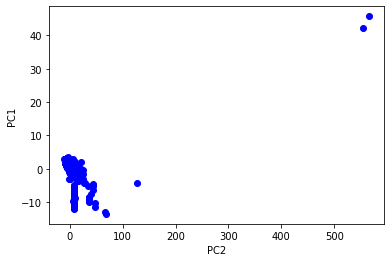

Plotting 2 PCs of KPCA


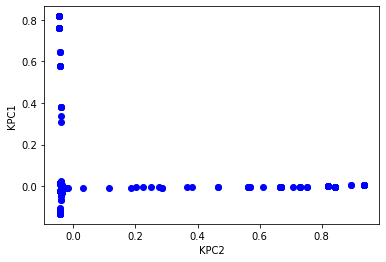

In [7]:
print('Plotting 2 PCs of PCA')
plt.plot(after_pca[:,0], after_pca[:,1], 'bo')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()
print('Plotting 2 PCs of KPCA')
plt.plot(after_kpca[:,0], after_kpca[:,1], 'bo')
plt.ylabel('KPC1')
plt.xlabel('KPC2')
plt.show()

In [344]:
principalDf = pd.DataFrame(data = after_pca
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data_set['Family']],axis=1)

display(finalDf)

,principal component 1,principal component 2,Family
0,-9.442722,2.173734,Globin
1,-9.635750,2.649910,Globin
2,-9.468790,2.160254,Globin
3,-4.937397,2.619619,Globin
4,-9.394900,2.156112,Globin
...,...,...,...
2495,7.533007,-8.905723,Ligase
2496,7.398080,-8.531896,Ligase
2497,7.583992,-8.599724,Ligase
2498,7.616698,-8.800730,Ligase


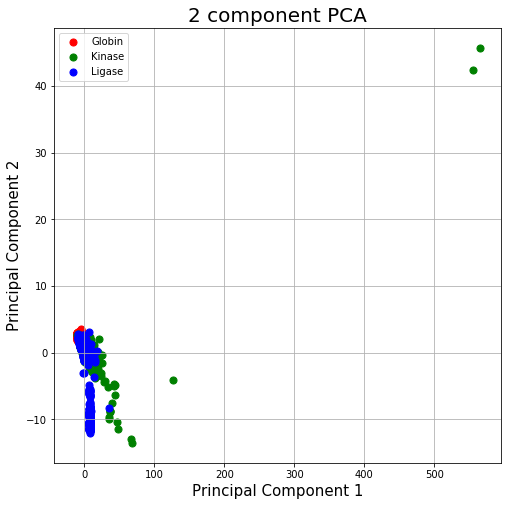

In [345]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Globin', 'Kinase', 'Ligase']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Family'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [346]:
KPCAprincipalDf = pd.DataFrame(data = after_kpca
             , columns = ['kernel principal component 1', 'kernel principal component 2'])

KPCAfinalDf = pd.concat([KPCAprincipalDf, data_set['Family']],axis=1)

display(KPCAfinalDf)

,kernel principal component 1,kernel principal component 2,Family
0,-0.380696,-0.002432,Globin
1,-0.385204,-0.001189,Globin
2,-0.374406,-0.013173,Globin
3,-0.276817,0.179842,Globin
4,-0.377926,-0.009463,Globin
...,...,...,...
2495,0.530910,0.240105,Ligase
2496,0.520980,0.251131,Ligase
2497,0.524242,0.217401,Ligase
2498,0.529178,0.225245,Ligase


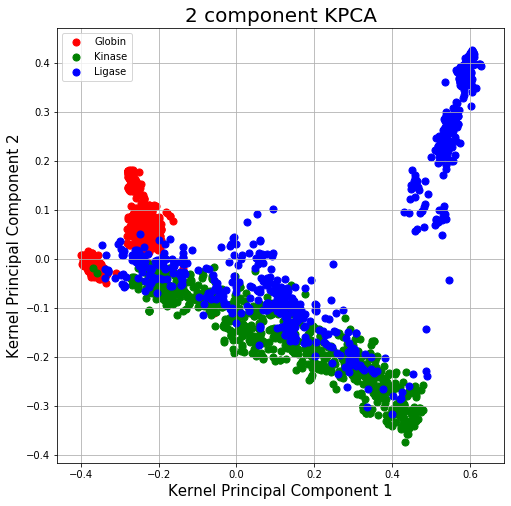

In [347]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Kernel Principal Component 1', fontsize = 15)
ax.set_ylabel('Kernel Principal Component 2', fontsize = 15)
ax.set_title('2 component KPCA', fontsize = 20)
targets = ['Globin', 'Kinase', 'Ligase']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = KPCAfinalDf['Family'] == target
    ax.scatter(KPCAfinalDf.loc[indicesToKeep, 'kernel principal component 1']
               , KPCAfinalDf.loc[indicesToKeep, 'kernel principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [361]:
#PCA and KPCA for a total of 3 principal axes
pca_object = PCA(n_components=3)
after_pca = pca_object.fit_transform(X)

print("Shape of Matrix after choosing 3 Principal Componenet from PCA: ", after_pca.shape)
display(after_pca[0:5])

kpca_object = KernelPCA(n_components=3, kernel='rbf',gamma=1/470)
after_kpca = kpca_object.fit_transform(X)

print("Shape of Matrix after choosing 3 Principal Componenet from KPCA: ", after_kpca.shape)
display(after_kpca[0:5])

Shape of Matrix after choosing 3 Principal Componenet from PCA:  (2500, 3)


array([[-9.44,  2.17, -1.6 ],
       [-9.64,  2.65, -1.7 ],
       [-9.47,  2.16, -1.61],
       [-4.94,  2.62, -2.74],
       [-9.39,  2.16, -1.44]])

Shape of Matrix after choosing 3 Principal Componenet from KPCA:  (2500, 3)


array([[-0.38, -0.  ,  0.3 ],
       [-0.39, -0.  ,  0.28],
       [-0.37, -0.01,  0.31],
       [-0.28,  0.18, -0.31],
       [-0.38, -0.01,  0.3 ]])

Plotting 3 PCs of PCA


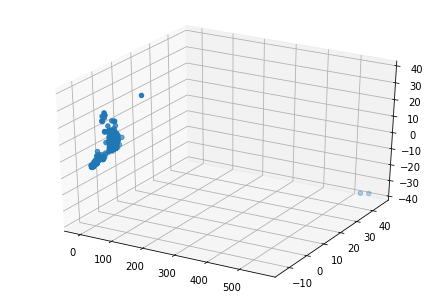

Plotting 3 PCs of KPCA


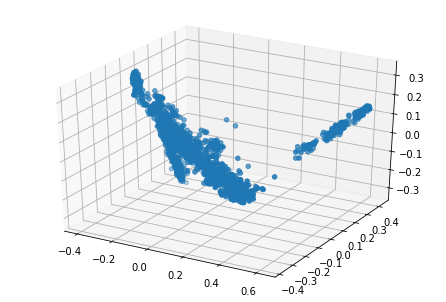

In [269]:
from mpl_toolkits.mplot3d import Axes3D
print('Plotting 3 PCs of PCA')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(after_pca[:,0], after_pca[:,1], after_pca[:,2])
plt.show()

print('Plotting 3 PCs of KPCA')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(after_kpca[:,0], after_kpca[:,1], after_kpca[:,2])
plt.show()


In [270]:
PCAprincipalDf = pd.DataFrame(data = after_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

PCAfinalDf = pd.concat([PCAprincipalDf, data_set['Family']],axis=1)

display(PCAfinalDf)

,principal component 1,principal component 2,principal component 3,Family
0,-9.442722,2.173734,-1.601609,Globin
1,-9.635750,2.649911,-1.702577,Globin
2,-9.468790,2.160254,-1.607185,Globin
3,-4.937397,2.619619,-2.744369,Globin
4,-9.394900,2.156112,-1.441425,Globin
...,...,...,...,...
2495,7.533007,-8.905724,-3.300840,Ligase
2496,7.398080,-8.531897,-3.442808,Ligase
2497,7.583992,-8.599725,-3.087549,Ligase
2498,7.616698,-8.800731,-3.105771,Ligase


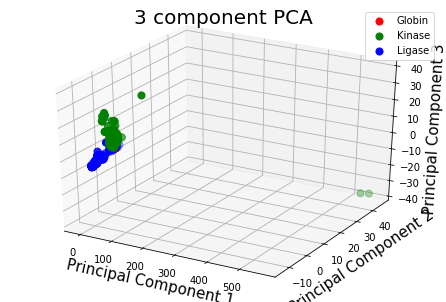

In [271]:

fig = plt.figure()
ax = Axes3D(fig) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Globin', 'Kinase', 'Ligase']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = PCAfinalDf['Family'] == target
    ax.scatter(PCAfinalDf.loc[indicesToKeep, 'principal component 1']
               , PCAfinalDf.loc[indicesToKeep, 'principal component 2']
               , PCAfinalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [362]:
KPCAprincipalDf = pd.DataFrame(data = after_kpca
             , columns = ['kernel principal component 1', 'kernel principal component 2', 'kernel principal component 3'])

KPCAfinalDf = pd.concat([KPCAprincipalDf, data_set['Family']],axis=1)

display(KPCAfinalDf)

,kernel principal component 1,kernel principal component 2,kernel principal component 3,Family
0,-0.380696,-0.002432,0.297503,Globin
1,-0.385204,-0.001189,0.280217,Globin
2,-0.374406,-0.013173,0.308223,Globin
3,-0.276817,0.179842,-0.306373,Globin
4,-0.377926,-0.009463,0.301545,Globin
...,...,...,...,...
2495,0.530910,0.240105,0.063319,Ligase
2496,0.520980,0.251131,0.057339,Ligase
2497,0.524242,0.217401,0.060896,Ligase
2498,0.529178,0.225245,0.064698,Ligase


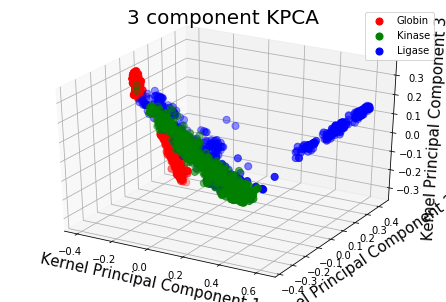

In [363]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.set_xlabel('Kernel Principal Component 1', fontsize = 15)
ax.set_ylabel('Kernel Principal Component 2', fontsize = 15)
ax.set_zlabel('Kernel Principal Component 3', fontsize = 15)
ax.set_title('3 component KPCA', fontsize = 20)
targets = ['Globin', 'Kinase', 'Ligase']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = KPCAfinalDf['Family'] == target
    ax.scatter(KPCAfinalDf.loc[indicesToKeep, 'kernel principal component 1']
               , KPCAfinalDf.loc[indicesToKeep, 'kernel principal component 2']
               , KPCAfinalDf.loc[indicesToKeep, 'kernel principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [8]:
#PCA and KPCA for a total of 10 principal axes
pca_object = PCA(n_components=10)
after_pca = pca_object.fit_transform(X)

print("Shape of Matrix after choosing 10 Principal Componenet from PCA: ", after_pca.shape)
display(after_pca[0:5])

kpca_object = KernelPCA(n_components=10, kernel='rbf')
after_kpca = kpca_object.fit_transform(X)

print("Shape of Matrix after choosing 10 Principal Componenet from KPCA: ", after_kpca.shape)
display(after_kpca[0:5])

Shape of Matrix after choosing 10 Principal Componenet from PCA:  (2500, 10)


array([[-9.4427221 ,  2.17373434, -1.60160654, -3.16966871,  1.52090669,
        -0.04769215, -0.5368706 ,  0.51256557, -0.29147986,  1.2814918 ],
       [-9.63575032,  2.6499105 , -1.70257551, -2.62458324,  1.84289498,
        -0.09704079, -0.58471742,  1.52944232, -0.82108214,  0.86418417],
       [-9.4687903 ,  2.1602538 , -1.60718254, -3.60835048,  0.9873572 ,
        -0.17183378, -0.25219682,  0.80985699, -0.12851485,  0.82039612],
       [-4.93739733,  2.61961915, -2.74437085,  5.36404005,  0.3536384 ,
         3.19884806, -1.9169086 ,  1.45450002,  0.94361997,  0.66830232],
       [-9.39490008,  2.15611157, -1.44142273, -3.36870479,  1.27067638,
        -0.17064727, -0.71060005,  0.75563987, -0.24868541,  1.31018425]])

Shape of Matrix after choosing 10 Principal Componenet from KPCA:  (2500, 10)


array([[-0.38069554, -0.00243179,  0.29750285,  0.14161843, -0.00257614,
         0.04837873, -0.00734769,  0.02578974,  0.03604986, -0.02285335],
       [-0.38520351, -0.00118944,  0.28021686,  0.18717171,  0.01014189,
         0.03070561, -0.00222877,  0.01517054,  0.07628067,  0.01136133],
       [-0.3744056 , -0.01317285,  0.30822331,  0.11750246, -0.00159029,
         0.05916876,  0.01291996,  0.0255604 ,  0.02332169, -0.01285955],
       [-0.27681694,  0.17984154, -0.30637305,  0.18196335, -0.11824576,
         0.083939  ,  0.03078814, -0.01205107, -0.07202917,  0.08077597],
       [-0.37792636, -0.00946283,  0.30154511,  0.12977208, -0.0145472 ,
         0.0586458 , -0.00556965,  0.02235556,  0.02578706, -0.00884171]])

In [9]:
from sklearn.model_selection import train_test_split #For splitting TRAIN and TEST dataset

#Train Test Split 
## PCA
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(after_pca, Y, train_size = 0.7, random_state=1)

print("PCA Shapes ")
print("X Train shape ",X_train_pca.shape)
print("Y Train shape ",Y_train_pca.shape)
print("X Test shape ",X_test_pca.shape)
print("Y Test shape ",Y_test_pca.shape)

## KPCA
X_train_kpca, X_test_kpca, Y_train_kpca, Y_test_kpca = train_test_split(after_kpca, Y, train_size = 0.7, random_state=1)

print("\nKPCA Shapes ")
print("X Train shape ",X_train_kpca.shape)
print("Y Train shape ",Y_train_kpca.shape)
print("X Test shape ",X_test_kpca.shape)
print("Y Test shape ",Y_test_kpca.shape)


PCA Shapes 
X Train shape  (1750, 10)
Y Train shape  (1750,)
X Test shape  (750, 10)
Y Test shape  (750,)

KPCA Shapes 
X Train shape  (1750, 10)
Y Train shape  (1750,)
X Test shape  (750, 10)
Y Test shape  (750,)


In [10]:
#split into superfamilies (Categories)
print("For Training Set in PCA: ")

train_PCA_g = X_train_pca[Y_train_pca == 'Globin']
train_PCA_k = X_train_pca[Y_train_pca == 'Kinase']
train_PCA_l = X_train_pca[Y_train_pca == 'Ligase']

print("PCA Globin Train Set Shape: ", train_PCA_g.shape)
print("PCA Kinase Train Set Shape: ", train_PCA_k.shape)
print("PCA Ligase Train Set Shape: ", train_PCA_l.shape)

print("For Training Set KPCA: ")

train_KPCA_g = X_train_kpca[Y_train_kpca == 'Globin']
train_KPCA_k = X_train_kpca[Y_train_kpca == 'Kinase']
train_KPCA_l = X_train_kpca[Y_train_kpca == 'Ligase']

print("KPCA Globin Train Set Shape: ", train_KPCA_g.shape)
print("KPCA Kinase Train Set Shape: ", train_KPCA_k.shape)
print("KPCA Ligase Train Set Shape: ", train_KPCA_l.shape)

For Training Set in PCA: 
PCA Globin Train Set Shape:  (712, 10)
PCA Kinase Train Set Shape:  (508, 10)
PCA Ligase Train Set Shape:  (530, 10)
For Training Set KPCA: 
KPCA Globin Train Set Shape:  (712, 10)
KPCA Kinase Train Set Shape:  (508, 10)
KPCA Ligase Train Set Shape:  (530, 10)


In [11]:
groups = data_set.groupby('Family')
number_of_classes = len(groups) #number of classes globin kinase ligase 
dictionary_of_sum = {}
numrber_of_components  = 10 # We have 10 PCAs
sigma = 0.3 #smoothing factor

# Implementation of PNN using PCA

print('_'*10 ,'PNN using PCA','_'*10)
PCA_array_of_classified_points = [] # to save final result PCA

#data points that we wish to classifiy
array_of_points = X_test_pca

# Loop via the number of data points that we wish to classifiy 
for point_want_to_classify in array_of_points:

    # INPUT LAYER OF THE PNN
    
    dictionary_of_sum['Globin'] = 0 
    sum_pdf_g = 0.0
    
    # Loop via the number of training example in globin class
    for globin in train_PCA_g:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum + np.power(point_want_to_classify[i]-globin[i],2)
        # Summation
        sum_pdf_g =sum_pdf_g + np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Globin']  = sum_pdf_g
    
    dictionary_of_sum['Kinase'] = 0
    sum_pdf_k = 0.0
    
    # Loop via the number of training example in kinase class 
    for kinase in train_PCA_k:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum+ np.power(point_want_to_classify[i]-kinase[i],2)
        # Summation
        sum_pdf_k =sum_pdf_k + np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Kinase']  = sum_pdf_k
    
    dictionary_of_sum['Ligase'] = 0 
    sum_pdf_l = 0.0
    
    # Loop via the number of training example in ligase class
    for ligase in train_PCA_l:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum+ np.power(point_want_to_classify[i]-ligase[i],2)
        # Summation
        sum_pdf_l =sum_pdf_l+ np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Ligase']  = sum_pdf_l
    
    # Select the appropriate class (class with the highest value)
    classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )
    
    # Add classfied clss to the array
    PCA_array_of_classified_points.append(classified_class)

print('shape of PNN PCA file ',np.array(PCA_array_of_classified_points).shape)
# save result to csv file
pd.DataFrame(PCA_array_of_classified_points,columns=['Family']).to_csv(
    "Result/PNN_PCA_file_of_classified_points.csv", sep=',',index=False)
print('File saved to Result/PNN_PCA_file_of_classified_points.csv')

#Read from file
fdf= pd.read_csv("Result/PNN_PCA_file_of_classified_points.csv")
display(fdf.sample(10))


# Implementation of PNN using KPCA

print('_'*10 ,'PNN using KPCA','_'*10)
dictionary_of_sum = {}
KPCA_array_of_classified_points = [] # to save final result PCA

#data points that we wish to classifiy
array_of_points = X_test_kpca

# Loop via the number of data points that we wish to classifiy 
for point_want_to_classify in array_of_points:

    # INPUT LAYER OF THE PNN
    
    dictionary_of_sum['Globin'] = 0 
    sum_pdf_g = 0.0
    
    # Loop via the number of training example in globin class
    for globin in train_KPCA_g:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum + np.power(point_want_to_classify[i]-globin[i],2)
        # Summation
        sum_pdf_g =sum_pdf_g + np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Globin']  = sum_pdf_g
    
    dictionary_of_sum['Kinase'] = 0
    sum_pdf_k = 0.0
    
    # Loop via the number of training example in kinase class 
    for kinase in train_KPCA_k:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum + np.power(point_want_to_classify[i]-kinase[i],2)
        # Summation
        sum_pdf_k =sum_pdf_k + np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Kinase']  = sum_pdf_k
    
    dictionary_of_sum['Ligase'] = 0 
    sum_pdf_l = 0.0
    
    # Loop via the number of training example in ligase class
    for ligase in train_KPCA_l:
        # PATTERN LAYER OF PNN
        sum = 0
        for i in range(0,numrber_of_components):
            sum =sum + np.power(point_want_to_classify[i]-ligase[i],2)
        # Summation
        sum_pdf_l =sum_pdf_l + np.exp((-1*sum)/( 2 * np.power(sigma,2) ))
    dictionary_of_sum['Ligase']  = sum_pdf_l
    
    # Select the appropriate class (class with the highest value)
    classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )
    
    # Add classfied clss to the array
    KPCA_array_of_classified_points.append(classified_class)
    
print('shape of PNN KPCA file ',np.array(KPCA_array_of_classified_points).shape)
# save result to csv file
pd.DataFrame(KPCA_array_of_classified_points,columns=['Family']).to_csv(
    "Result/PNN_KPCA_file_of_classified_points.csv", sep=',',index=False)
print('File saved to Result/PNN_KPCA_file_of_classified_points.csv')

#Read from file
fdf= pd.read_csv("Result/PNN_KPCA_file_of_classified_points.csv")
display(fdf.sample(10))       

        

__________ PNN using PCA __________
shape of PNN PCA file  (750,)
File saved to Result/PNN_PCA_file_of_classified_points.csv


,Family
45,Ligase
182,Globin
712,Ligase
120,Kinase
276,Globin
366,Globin
106,Kinase
692,Ligase
593,Globin
541,Ligase


__________ PNN using KPCA __________
shape of PNN KPCA file  (750,)
File saved to Result/PNN_KPCA_file_of_classified_points.csv


,Family
174,Globin
430,Kinase
316,Kinase
551,Globin
570,Globin
611,Globin
359,Kinase
733,Kinase
646,Ligase
482,Ligase


## Mesure Performance

In [382]:
#Read from CSVs files

pnn_pca_result = pd.read_csv("Result/PNN_PCA_file_of_classified_points.csv")
pnn_kpca_result = pd.read_csv("Result/PNN_KPCA_file_of_classified_points.csv")

print("PCA Results Shape: ", pnn_pca_result.shape)
print("KPCA Results Shape: ", pnn_kpca_result.shape)

print("PNN_PCA Results:")
display(pnn_pca_result.sample(10))
print("PNN_KPCA Results:")
display(pnn_kpca_result.sample(10))

PCA Results Shape:  (750, 1)
KPCA Results Shape:  (750, 1)
PNN_PCA Results:


,Family
678,Kinase
559,Ligase
374,Ligase
258,Kinase
622,Kinase
182,Globin
552,Ligase
501,Kinase
665,Ligase
234,Globin


PNN_KPCA Results:


,Family
727,Ligase
14,Kinase
182,Globin
45,Ligase
507,Kinase
228,Globin
192,Kinase
619,Globin
52,Kinase
602,Globin


In [369]:
from sklearn.metrics import jaccard_similarity_score as jss
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder #To convert categorical data to numerica data

In [383]:
#Converting categorical to numerical; 
## 0 -> Globin 
## 1-> Kinase 
## 2-> Ligase
encoder = LabelEncoder()
Ynum = pd.Series(encoder.fit_transform(Y_test_pca)) 
pnn_kpca_num = pd.Series(encoder.fit_transform(pnn_kpca_result)) 
pnn_pca_num = pd.Series(encoder.fit_transform(pnn_pca_result)) 
display(pnn_pca_num.sample(10))

139    0
312    1
88     1
177    2
269    0
11     0
13     2
425    2
422    1
563    1
dtype: int32

In [384]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Ynum,pnn_pca_num, labels=[0,1,2]))

[[288   0   0]
 [  3 226  13]
 [  1  10 209]]


## PNN PCA Performance meaures

Confusion matrix, without normalization
[[288   0   0]
 [  3 226  13]
 [  1  10 209]]


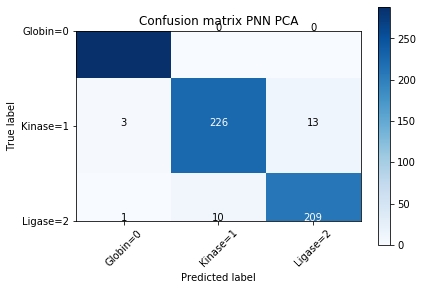

In [385]:
# Compute confusion matrix of PNN PCA
cnf_matrix = confusion_matrix(Ynum,pnn_pca_num, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix of PNN PCA
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Globin=0','Kinase=1','Ligase=2'],
                      normalize= False,  title='Confusion matrix PNN PCA')

In [386]:
print (classification_report(Ynum,pnn_pca_num))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       288
           1       0.96      0.93      0.95       242
           2       0.94      0.95      0.95       220

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



## PNN KPCA Performance meaures

Confusion matrix, without normalization
[[288   0   0]
 [ 42 200   0]
 [ 27  70 123]]


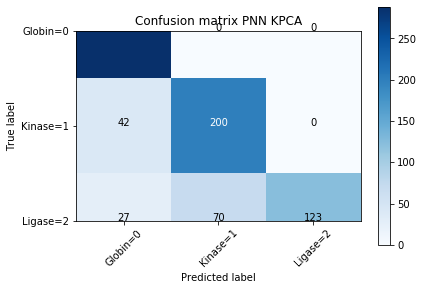

In [393]:
# Compute confusion matrix of PNN KPCA
cnf_matrix = confusion_matrix(Ynum,pnn_kpca_num, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix of PNN KPCA
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Globin=0','Kinase=1','Ligase=2']
                      ,normalize= False,  title='Confusion matrix PNN KPCA')

In [388]:
print (classification_report(Ynum,pnn_kpca_num))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       288
           1       0.74      0.83      0.78       242
           2       1.00      0.56      0.72       220

    accuracy                           0.81       750
   macro avg       0.85      0.80      0.80       750
weighted avg       0.84      0.81      0.81       750



<h1 align="center"><font size="4">
Finally :</font></h1>

<h1 ><font size="4">
 - For PNN PCA Results depends on Smoothing factor(Sigma)
  <br>- For PNN KPCA Result depends on Gamma (by default Gamma = 1/470 where 470 n_features) and Smoothnig factor (Sigma)<br>- The number of Principal Components PCs has no much effect on accuracy 3 to 10 Pcs gave good result but slowly were PCs are increased   
</font></h1>